Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Functions

In [31]:
def normalise(dataset, name):
    mean = dataset[name].mean()
    std = dataset[name].std()
    dataset[name] = (dataset[name] - mean) / std

def compile_model(name, drop):
    model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(10)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu')
    ], name = name)
    if drop == True:
        model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def history_data(history_train):
    f, ax = plt.subplots(ncols = 2, figsize = (12,6))
    ax[0].plot(history_train.history['accuracy'])
    ax[0].plot(history_train.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set(ylabel = 'accuracy', xlabel = 'epoch')
    ax[0].legend(['train', 'validation'], loc='upper left')

    ax[1].plot(history_train.history['loss'])
    ax[1].plot(history_train.history['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set(ylabel = 'loss', xlabel = 'epoch')
    ax[1].legend(['train', 'validation'], loc='upper right')

def performance_data(train, train_pred, test, test_pred):
    f, ax = plt.subplots(ncols = 2, figsize = (12,4))
    cm_train = confusion_matrix(train, train_pred)
    sb.heatmap(cm_train, fmt='.0f', annot = True, ax=ax[0])

    cm_test = confusion_matrix(test, test_pred)
    sb.heatmap(cm_test, fmt='.0f', annot = True, ax=ax[1])

    ax[0].set(xlabel='Predicted', ylabel='Actual', title='Training Performance')
    ax[1].set(xlabel='Predicted', ylabel='Actual', title='Testing Performance')

    plt.show()

Reading and reformatting data

In [32]:
phishdata_train = pd.read_csv('Datasets/selected_dataset.csv')
phishdata_train.head()


,url,total_of_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_extHyperlinks,links_in_tags,safe_anchor,domain_age,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,1,5,0,143,0.069930,73.913043,77.777778,6678,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,0,0,2,0,0.000000,0.000000,0.000000,65,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,1,9,0,3,0.000000,100.000000,0.000000,1707,1,0,phishing
3,http://www.jp519.com/,1,0,0,404,0.037129,100.000000,82.539683,1331,0,0,legitimate
4,https://www.velocidrone.com/,1,0,0,57,0.315789,55.555556,81.081081,1662,0,4,legitimate


In [33]:
#Remove url as it is not needed
phishdata_train = phishdata_train.drop(['url'], axis=1)

In [34]:
#Normalise numerical data and convert result(status) to 1=phishing, 0=legitamate
normalise(phishdata_train, 'total_of_www')
normalise(phishdata_train, 'longest_word_path')
normalise(phishdata_train, 'phish_hints')
normalise(phishdata_train, 'nb_hyperlinks')
normalise(phishdata_train, 'links_in_tags')
normalise(phishdata_train, 'ratio_extHyperlinks')
normalise(phishdata_train, 'domain_age')
normalise(phishdata_train, 'safe_anchor')
normalise(phishdata_train, 'page_rank')
#status
phishdata_train['status'] = phishdata_train['status'].map({'legitimate':0, 'phishing':1}).astype(int)

In [35]:
phishdata_train.head()

,total_of_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_extHyperlinks,links_in_tags,safe_anchor,domain_age,google_index,page_rank,status
0,1.071449,-0.222422,-0.376892,0.284695,-0.678046,0.555433,1.076004,0.645048,0,0.600211,1
1,-0.917924,-0.456446,2.118462,-0.526724,-0.894140,-1.241504,-0.950768,-1.723630,1,-1.366147,1
2,1.071449,-0.035204,-0.376892,-0.509701,-0.894140,1.189646,-0.950768,-1.135491,1,-1.366147,1
3,1.071449,-0.456446,-0.376892,1.765677,-0.779407,1.189646,1.200092,-1.270168,0,-1.366147,0
4,1.071449,-0.456446,-0.376892,-0.203291,0.081697,0.109135,1.162083,-1.151609,0,0.206939,0


In [36]:
#Convert pandas dataframe into numpy array and split into 0.75 train 0.25 test
data_train = phishdata_train.drop('status', axis=1).to_numpy()
status_train = phishdata_train['status'].to_numpy()

data_train, data_test, status_train, status_test = train_test_split(data_train, status_train, test_size=0.25)

Creating a basic neural network

In [37]:
model = compile_model('Basic', drop=False)
model.summary()

Model: "Basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1408      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 34,689
Trainable params: 34,689
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(data_train, status_train, epochs=20, validation_split = 0.1)

Epoch 1/20
326/326 [==============================] - 1s 2ms/step - loss: 0.2055 - accuracy: 0.9255 - val_loss: 0.1620 - val_accuracy: 0.9438
Epoch 2/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9376 - val_loss: 0.1540 - val_accuracy: 0.9430
Epoch 3/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9432 - val_loss: 0.1447 - val_accuracy: 0.9455
Epoch 4/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1442 - accuracy: 0.9449 - val_loss: 0.1497 - val_accuracy: 0.9421
Epoch 5/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9497 - val_loss: 0.1383 - val_accuracy: 0.9568
Epoch 6/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1319 - accuracy: 0.9499 - val_loss: 0.1325 - val_accuracy: 0.9507
Epoch 7/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1281 - accuracy: 0.9522 - val_loss: 0.1380 - val_accuracy: 0.9499
Epoch 

121/121 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9486


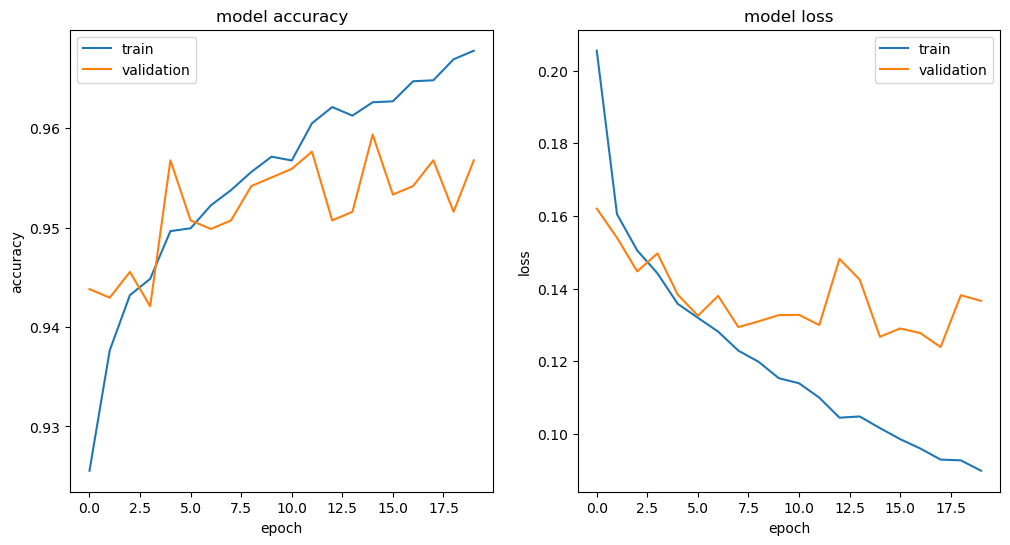

In [39]:
test_loss, test_acc = model.evaluate(data_test,  status_test, verbose=1) 

history_data(history)

121/121 [==============================] - 0s 1ms/step


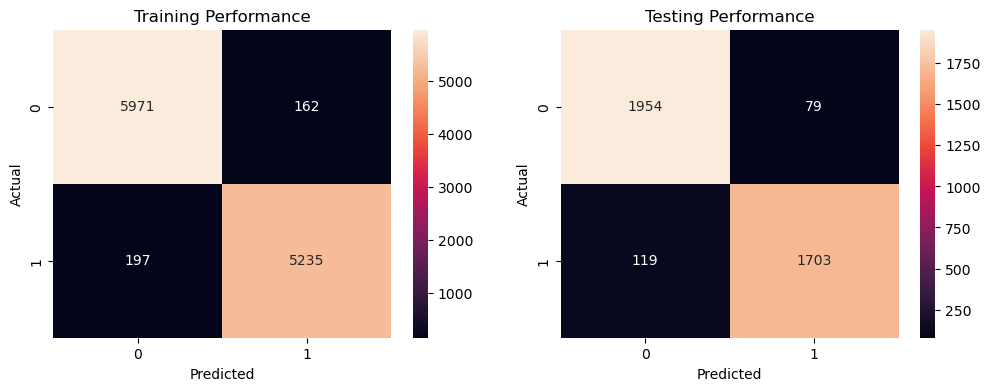

In [40]:
status_train_pred = (model.predict(data_train) >= 0.5).astype('int32')
status_test_pred = (model.predict(data_test) >= 0.5).astype('int32')
performance_data(status_train, status_train_pred, status_test, status_test_pred)

We can see that overfitting has caused the validation accuracy to stagnate from the 6th epoch onwards, this could be caused by overfitting of data. From our visualisation we also realised that page_rank and domain_age is moderately correlated which could cause overfitting. We can prevent that by implementing dropout layers which reduce overfitting.

Creating a neural network with dropout layers

In [47]:
model = compile_model('Dropout', drop=True)
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1408      
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 257       
                                                                 
Total params: 34,689
Trainable params: 34,689
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(data_train, status_train, epochs=20, validation_split = 0.1)

Epoch 1/20
326/326 [==============================] - 1s 3ms/step - loss: 0.2087 - accuracy: 0.9232 - val_loss: 0.1705 - val_accuracy: 0.9386
Epoch 2/20
326/326 [==============================] - 1s 3ms/step - loss: 0.1640 - accuracy: 0.9374 - val_loss: 0.1532 - val_accuracy: 0.9455
Epoch 3/20
326/326 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9427 - val_loss: 0.1468 - val_accuracy: 0.9481
Epoch 4/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1451 - accuracy: 0.9447 - val_loss: 0.1506 - val_accuracy: 0.9430
Epoch 5/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1396 - accuracy: 0.9485 - val_loss: 0.1380 - val_accuracy: 0.9525
Epoch 6/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9498 - val_loss: 0.1425 - val_accuracy: 0.9507
Epoch 7/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1313 - accuracy: 0.9500 - val_loss: 0.1387 - val_accuracy: 0.9473
Epoch 

121/121 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9505


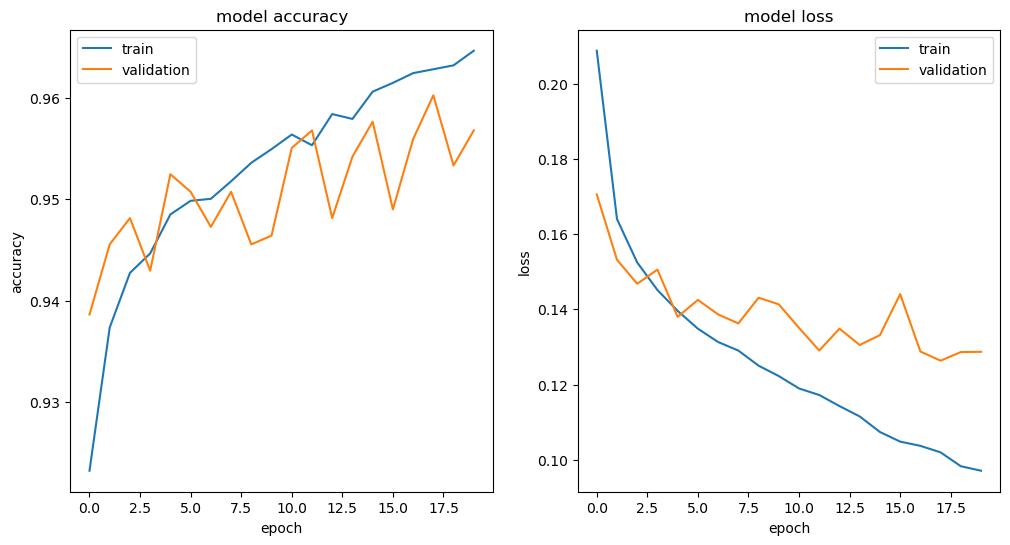

In [49]:
test_loss, test_acc = model.evaluate(data_test,  status_test, verbose=1) 

history_data(history)

121/121 [==============================] - 0s 1ms/step


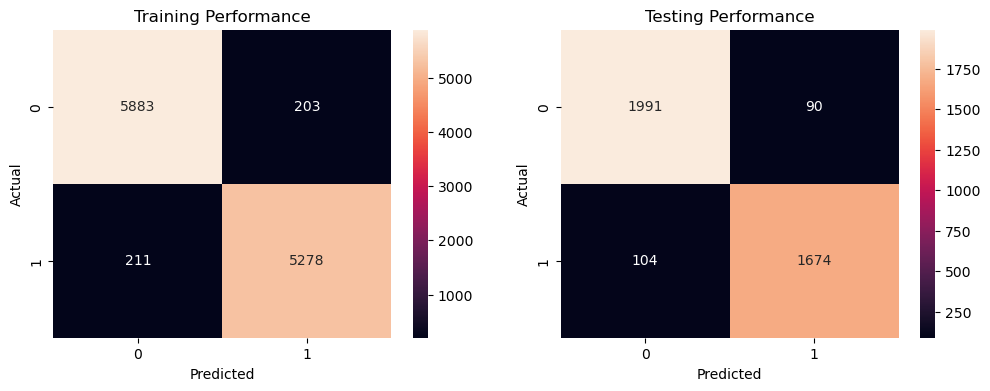

In [ ]:
status_train_pred = (model.predict(data_train) >= 0.5).astype('int32')
status_test_pred = (model.predict(data_test) >= 0.5).astype('int32')
performance_data(status_train, status_train_pred, status_test, status_test_pred)

After implementing the dropout layer we can see that the validation accuracy is steadily increasing and ends up higher than the one without dropout layers.